<a href="https://colab.research.google.com/github/cetinus-gulin/ie423/blob/main/task5-6-7/task5-gulin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

#dfFashion = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv')
dfFashion = pd.read_csv('mnist_fashion_train.csv')
dfFashion.dropna(how="any")
dfFashion.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
dfFashion.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.500000,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,2.872305,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [4]:
# Define target and features

y = dfFashion['label']
X = scale(dfFashion.drop(['label'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

# Analyze data

Clothing 				 Label
AxesImage(shape=(28, 28)) 		 9


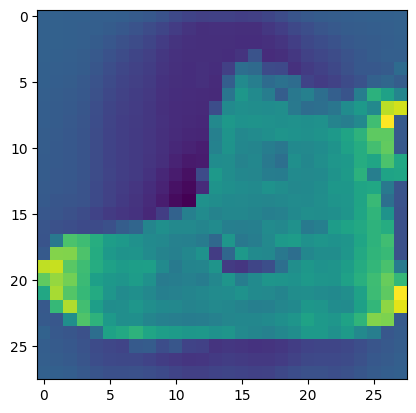

In [5]:
# Display first image
print('Clothing', '\t\t\t\t', 'Label')
print(plt.imshow(X[0].reshape((28,28))), '\t\t', y[0])

<Axes: ylabel='count'>

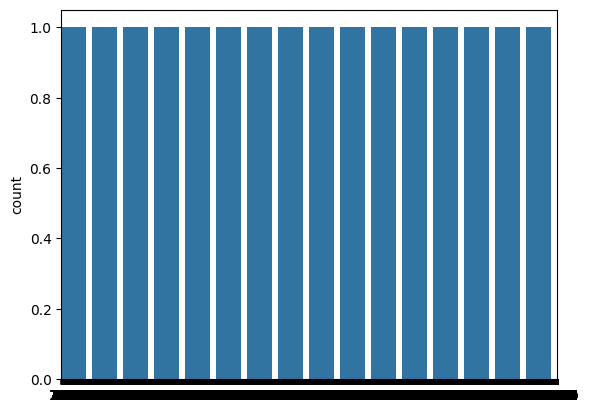

In [6]:
# Plot count of clothing types
sns.countplot(y)

# Predict clothing from picture

Suppor Vector Machine

In [7]:
%%time

# Build Support Vector Machines - Classifier model
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train, y_train)
y_test_pred = model_svm.predict(X_test)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y_test, y_test_pred))

Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1166
           1       0.99      0.98      0.98      1213
           2       0.83      0.81      0.82      1232
           3       0.88      0.90      0.89      1209
           4       0.80      0.85      0.83      1159
           5       0.97      0.95      0.96      1217
           6       0.74      0.66      0.70      1178
           7       0.93      0.96      0.95      1215
           8       0.95      0.97      0.96      1178
           9       0.96      0.94      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

CPU times: user 3min 32s, sys: 532 ms, total: 3min 33s
Wall time: 3min 34s


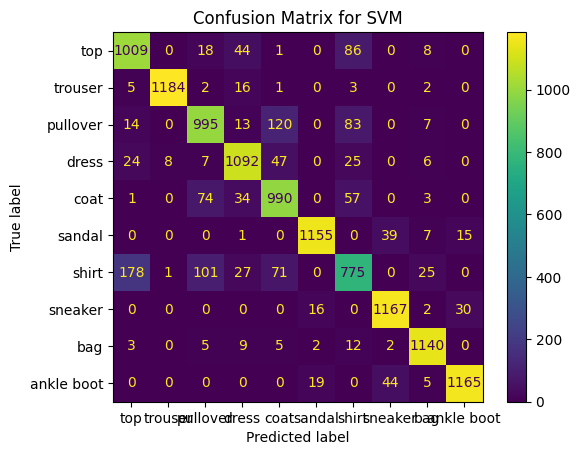

In [8]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for SVM
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"])
disp.plot()
plt.title("Confusion Matrix for SVM")
plt.show()

Neural Networks

In [9]:
%%time

# Build Neural Network - Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier()
model_nn.fit(X_train, y_train)
y_test_pred = model_nn.predict(X_test)

print ('Classification Report (Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1166
           1       0.99      0.99      0.99      1213
           2       0.81      0.76      0.78      1232
           3       0.88      0.90      0.89      1209
           4       0.78      0.83      0.81      1159
           5       0.95      0.95      0.95      1217
           6       0.72      0.68      0.70      1178
           7       0.93      0.95      0.94      1215
           8       0.96      0.95      0.95      1178
           9       0.96      0.95      0.95      1233

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

CPU times: user 5min 58s, sys: 9.57 s, total: 6min 8s
Wall time: 48.5 s


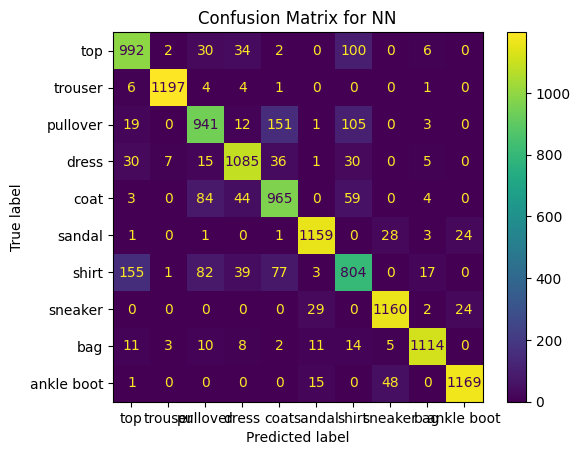

In [10]:
# Confusion matrix for NN
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"])
disp.plot()
plt.title("Confusion Matrix for NN")
plt.show()

Deep Neural Networks

In [11]:
%%time

# Build Deep Neural Network - Additional Hidden Layers
from sklearn.neural_network import MLPClassifier
model_dnn = MLPClassifier(hidden_layer_sizes=(100,100))
model_dnn.fit(X_train, y_train)
y_test_pred = model_dnn.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1166
           1       0.99      0.98      0.98      1213
           2       0.83      0.76      0.80      1232
           3       0.86      0.90      0.88      1209
           4       0.78      0.85      0.81      1159
           5       0.97      0.95      0.96      1217
           6       0.76      0.67      0.71      1178
           7       0.93      0.96      0.94      1215
           8       0.96      0.96      0.96      1178
           9       0.95      0.95      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.89      0.88     12000

CPU times: user 7min 35s, sys: 13.8 s, total: 7min 49s
Wall time: 1min 2s


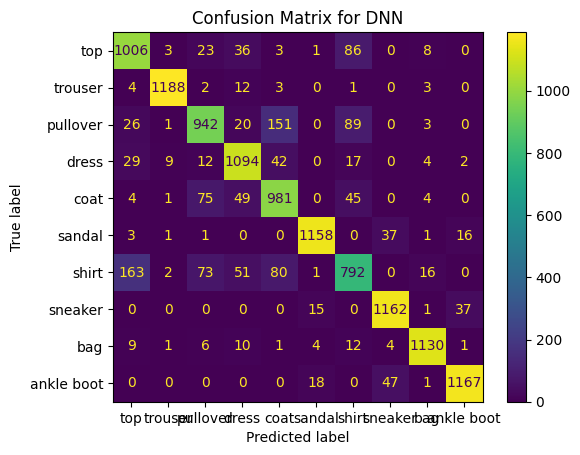

In [12]:
# Confusion matrix for DNN
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"])
disp.plot()
plt.title("Confusion Matrix for DNN")
plt.show()

# Cross Validation

In [13]:
# Cross-validate model across 7 different experiments
from sklearn.model_selection import cross_val_score
cross_val_score(model_dnn, X, y, cv=7, scoring='f1_macro')

array([0.88160714, 0.88991718, 0.88466377, 0.88694421, 0.88799797,
       0.88580861, 0.88542395])